In [82]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
x_tr = np.linspace(0, 30, 29).astype(np.float32).reshape(29,1)
y_tr = np.exp(x_tr).astype(np.float32).reshape(29,1)

/home/flo/EPFL/.venv-3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [74]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [75]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        #self.weights = np.random.random(2)
        self.w = Variable(torch.tensor([0.01]), requires_grad=True)
        self.b = Variable(torch.tensor([0.5], requires_grad=True))
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        print(x)
        return x * self.w + self.b

    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]

    def __call__(self, x):
        # Convenience function
        return self.forward(x)


def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    t = y - pred
    return (1 / y.shape[0]) * torch.sum((t @ t.T))

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype = np.float32)
torch_inputs = Variable(torch.from_numpy(numpy_inputs))
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

tensor([0., 1., 2.])
Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0.5000, 0.5100, 0.5200], grad_fn=<AddBackward0>)


In [134]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        torch_inputs = Variable(torch.from_numpy(features), requires_grad=True)
        torch_outputs = Variable(torch.from_numpy(labels))
        # TODO: Step 2 - compute model predictions and loss
        torch_pred = model(torch_inputs)
        loss = lossfunc(torch_pred, torch_outputs)
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epoch, loss))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(Variable(torch.from_numpy(x_tr))).data.numpy()
    order = np.argsort(x_tr, axis = 0)
    plt.plot(x_tr[order].flatten(), y_tr[order].flatten(), 'ro', label='Original data')
    plt.plot(x_tr[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000, 11.1111, 12.2222, 13.3333, 14.4444, 15.5556, 16.6667,
        17.7778, 18.8889, 20.0000], dtype=torch.float64, requires_grad=True)
Epoch [1/50], Loss: 9892294227924504.0000
tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000, 11.1111, 12.2222, 13.3333, 14.4444, 15.5556, 16.6667,
        17.7778, 18.8889, 20.0000], dtype=torch.float64, requires_grad=True)
tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000, 11.1111, 12.2222, 13.3333, 14.4444, 15.5556, 16.6667,
        17.7778, 18.8889, 20.0000], dtype=torch.float64, requires_grad=True)
tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000, 11.1111, 12.2222, 13.3333, 14.4444, 15.5556, 16.6667,
        17.7778, 18.8889, 20.0000], dtype=torch.float64, requires_grad=True)
tensor([ 0

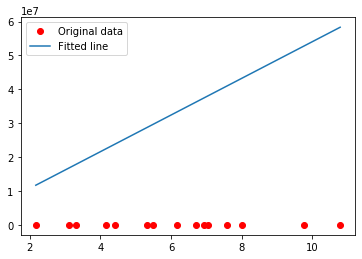

In [79]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_tr,
      labels = y_tr,
      model = model,
      lossfunc = mselossfunc, 
      optimizer = optimizer,
      num_epoch = 50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 1.9406
Epoch [11/100], Loss: 0.4630
Epoch [21/100], Loss: 0.2205
Epoch [31/100], Loss: 0.1807
Epoch [41/100], Loss: 0.1741
Epoch [51/100], Loss: 0.1730
Epoch [61/100], Loss: 0.1728
Epoch [71/100], Loss: 0.1728
Epoch [81/100], Loss: 0.1728
Epoch [91/100], Loss: 0.1727


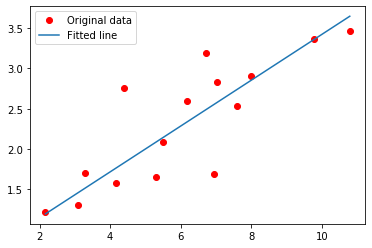

In [80]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        self.fc1 = nn.Linear(1, 1)
        
    def forward(self, x):
        # TODO: implement forward computation
        x = self.fc1(x)
        return x
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features = x_train,
      labels = y_train,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/300], Loss: 4461359465745462643916800.0000
Epoch [11/300], Loss: 4461359465745462643916800.0000
Epoch [21/300], Loss: 4461359465745462643916800.0000
Epoch [31/300], Loss: 4461359465745462643916800.0000
Epoch [41/300], Loss: 4461359465745462643916800.0000
Epoch [51/300], Loss: 4461359465745462643916800.0000
Epoch [61/300], Loss: 4461359465745462643916800.0000
Epoch [71/300], Loss: 4461359465745462643916800.0000
Epoch [81/300], Loss: 4461359465745462643916800.0000
Epoch [91/300], Loss: 4461359465745462643916800.0000
Epoch [101/300], Loss: 4461359465745462643916800.0000
Epoch [111/300], Loss: 4461359465745462643916800.0000
Epoch [121/300], Loss: 4461359465745462643916800.0000
Epoch [131/300], Loss: 4461359465745462643916800.0000
Epoch [141/300], Loss: 4461359465745462643916800.0000
Epoch [151/300], Loss: 4461359465745462643916800.0000
Epoch [161/300], Loss: 4461359465745462643916800.0000
Epoch [171/300], Loss: 4461359465745462643916800.0000
Epoch [181/300], Loss: 4461359465745462

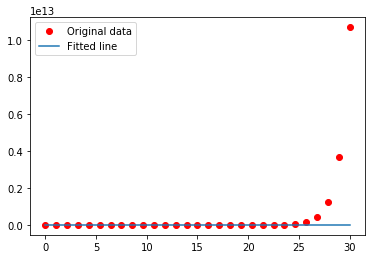

In [135]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 100
learning_rate = 0.01


model = MLP(hidden_size = hidden_size)

optimizer = torch.optim.Adam(model.parameters(), learning_rate)

train(features = x_tr,
      labels = y_tr,
      model = model,
      lossfunc = lossfunc,
      optimizer = optimizer,
      num_epoch = 300)
visualize(x_train, y_train, model)

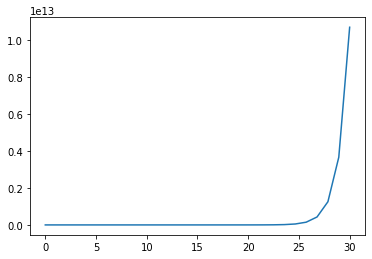

In [133]:
plt.plot(x_tr, y_tr)